#### Bayesian Logistic regression

* bayesian logistic regression redefined using pymc 5.1.2
* using bayesian inference to update the probability of a hypothesis given a new evidence

In [1]:
import numpy as np
import pymc as pm
import matplotlib.pyplot as plt
import pandas as pd
import arviz as az

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
n = 1000
df = pd.DataFrame({
    'x1' : np.random.normal(0,1,n),
    'x2' : np.random.normal(0,1,n),
    'y'  : np.random.binomial(1, 0.5, n)
})

In [3]:
log_reg = pm.Model()
with log_reg:
    #priors
    α = pm.Normal('α', mu = 0, sigma=1)
    β = pm.Normal('β', mu =0, sigma=1, shape =2)
    #likelihood
    p = pm.math.invlogit(α + β[0] * df['x1'] + β[1]*df['x2'])
    y_obs = pm.Binomial('y_obs', n =1, p =p, observed = df['y'] )

In [4]:
with log_reg:
    idata = pm.sample()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [α, β]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 27 seconds.


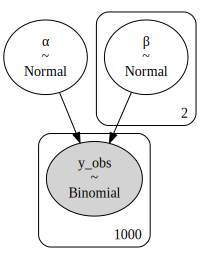

In [5]:
pm.model_to_graphviz(log_reg)

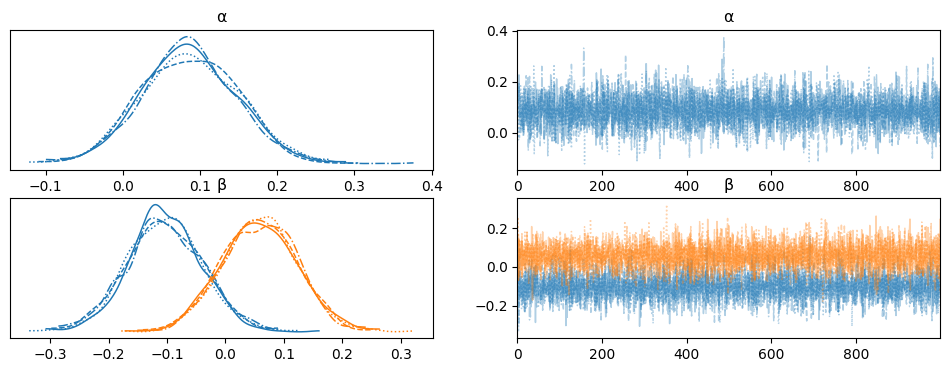

In [6]:
az.plot_trace(idata);

In [7]:
az.summary(idata, round_to=2)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
α,0.09,0.06,-0.03,0.20,0.0,0.0,5479.41,3134.15,1.0
β[0],-0.10,0.06,-0.22,0.02,0.0,0.0,5926.29,3041.65,1.0
β[1],0.06,0.06,-0.06,0.17,0.0,0.0,6342.54,3113.37,1.0


In [8]:
idata

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

In [9]:
with log_reg:
    pm.sample_posterior_predictive(idata, extend_inferencedata=True)

Sampling: [y_obs]


In [10]:
idata.posterior_predictive

<xarray.Dataset>
Dimensions:      (chain: 4, draw: 1000, y_obs_dim_2: 1000)
Coordinates:
  * chain        (chain) int32 0 1 2 3
  * draw         (draw) int32 0 1 2 3 4 5 6 7 ... 993 994 995 996 997 998 999
  * y_obs_dim_2  (y_obs_dim_2) int32 0 1 2 3 4 5 6 ... 994 995 996 997 998 999
Data variables:
    y_obs        (chain, draw, y_obs_dim_2) int64 1 0 0 0 1 0 0 ... 1 0 0 1 1 1
Attributes:
    created_at:                 2023-05-20T13:46:47.633696
    arviz_version:              0.15.1
    inference_library:          pymc
    inference_library_version:  5.1.2

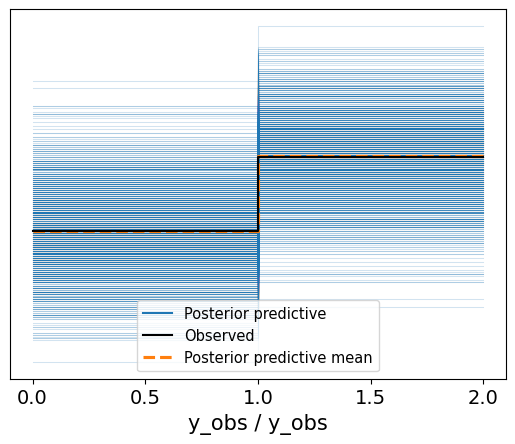

In [11]:
az.plot_ppc(idata, num_pp_samples=1000);

In [12]:
with log_reg:
    pm.compute_log_likelihood(idata)

In [13]:
log_reg_loo = az.loo(idata)
log_reg_loo

Computed from 4000 posterior samples and 1000 observations log-likelihood matrix.

         Estimate       SE
elpd_loo  -693.56     2.26
p_loo        2.95        -
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)     1000  100.0%
 (0.5, 0.7]   (ok)          0    0.0%
   (0.7, 1]   (bad)         0    0.0%
   (1, Inf)   (very bad)    0    0.0%

In [14]:
az.rhat(idata)

<xarray.Dataset>
Dimensions:  (β_dim_0: 2)
Coordinates:
  * β_dim_0  (β_dim_0) int32 0 1
Data variables:
    α        float64 1.003
    β        (β_dim_0) float64 1.001 1.001

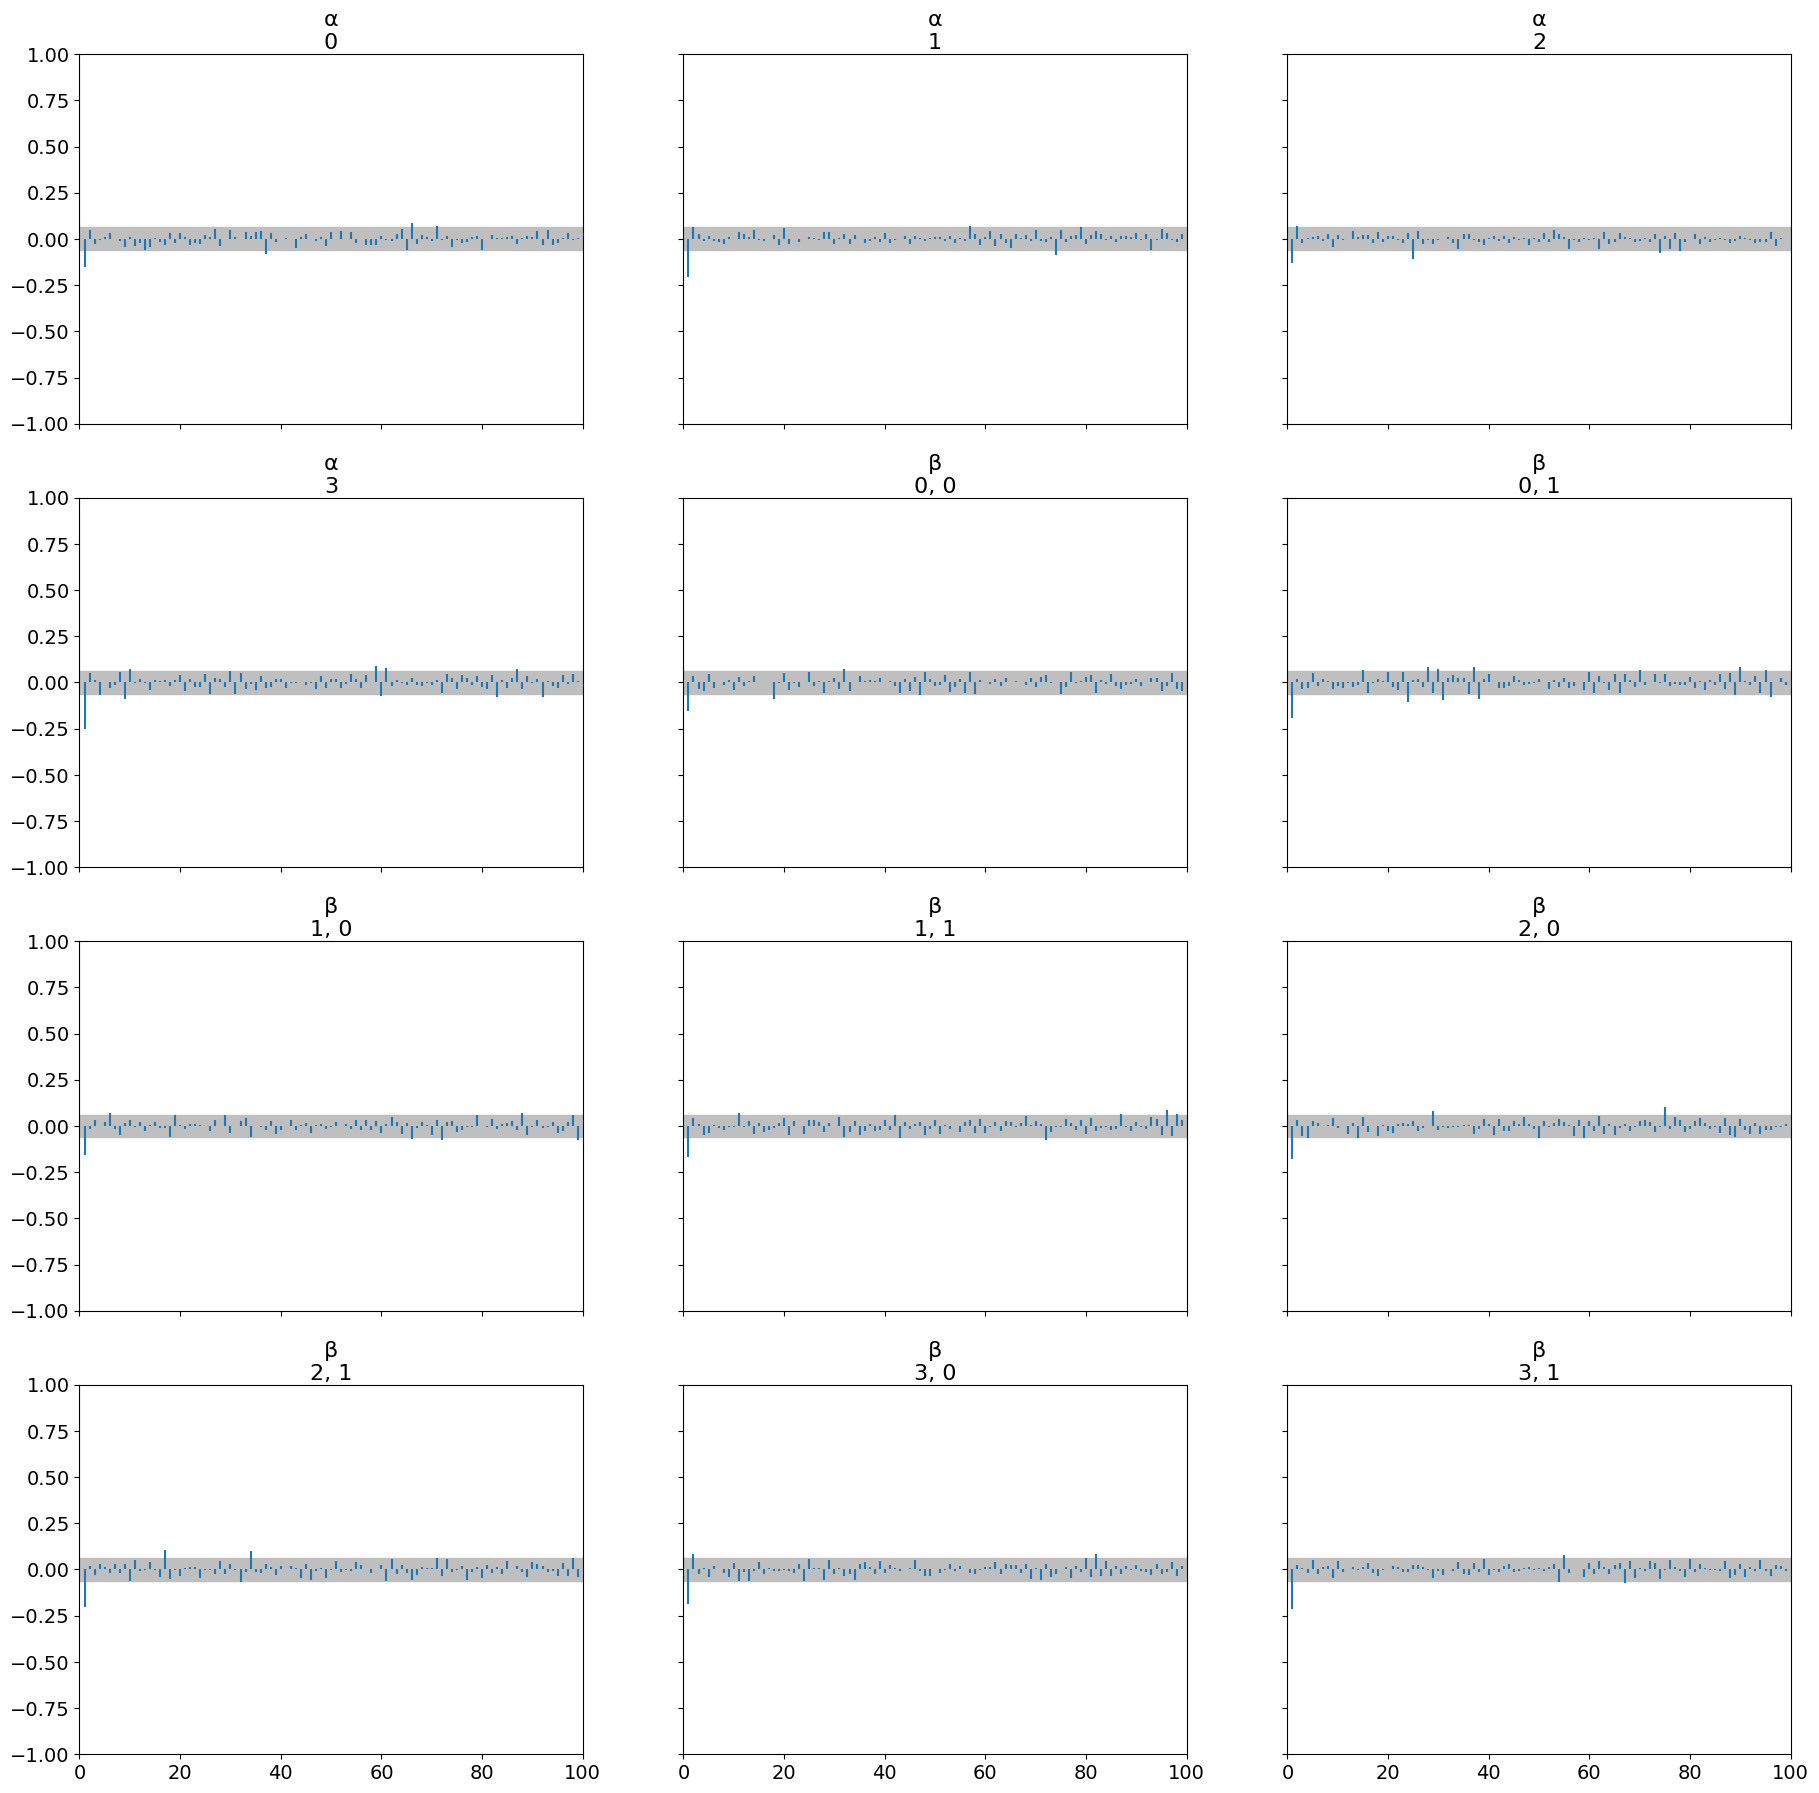

In [15]:
pm.plot_autocorr(idata);

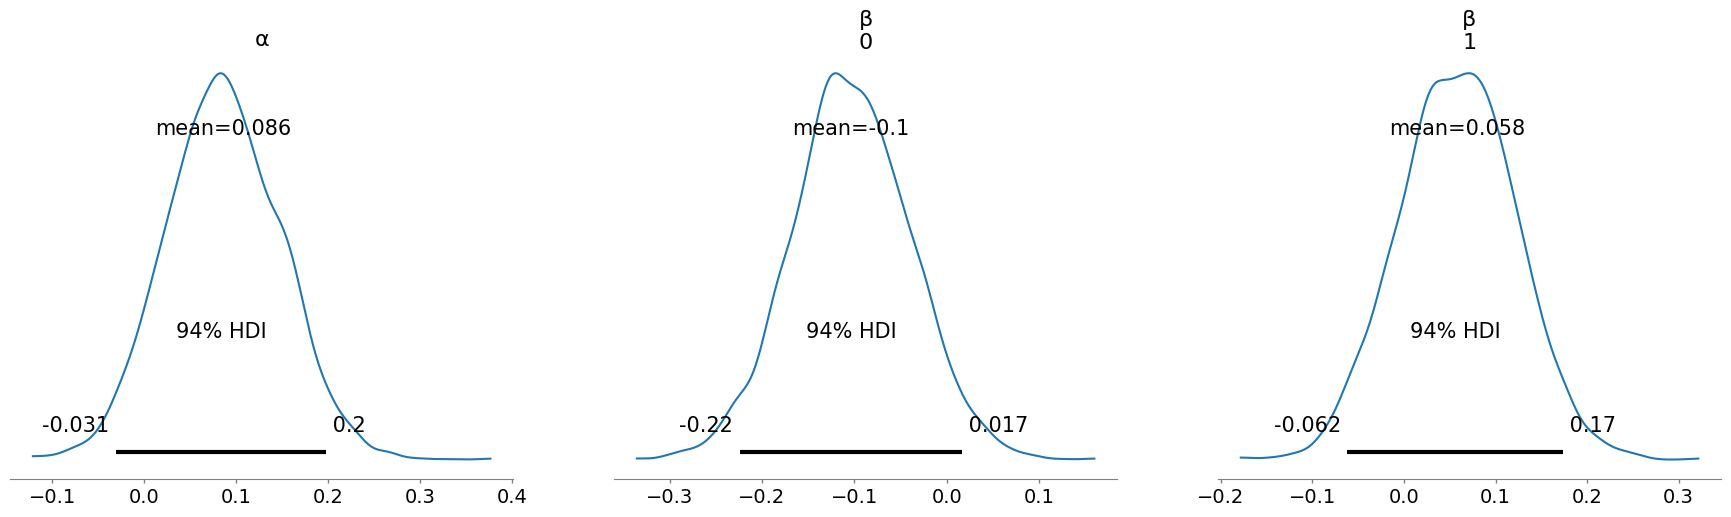

In [16]:
az.plot_posterior(idata);

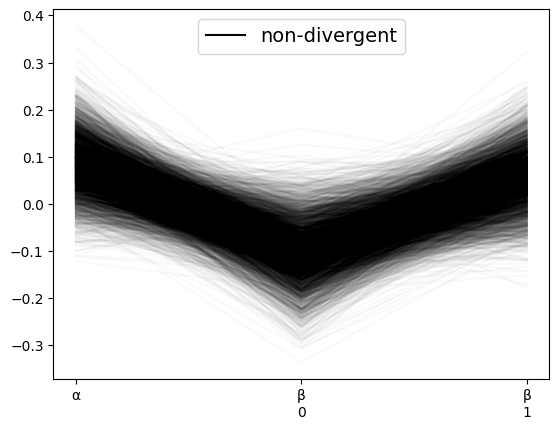

In [17]:
az.plot_parallel(idata);

In [18]:
%load_ext watermark
%watermark -n -u -v -iv -w

Last updated: Sat May 20 2023

Python implementation: CPython
Python version       : 3.11.0
IPython version      : 8.11.0

pandas    : 1.5.3
arviz     : 0.15.1
numpy     : 1.23.5
matplotlib: 3.7.1
pymc      : 5.1.2

Watermark: 2.3.1

